In [1]:
from pathlib import Path

import ll
import rich

run_id = "5jllbvl3"
run_dir = Path(
    f"/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/{run_id}/"
)
assert (
    run_dir.exists() and run_dir.is_dir()
), f"run_dir: {run_dir} does not exist or is not a directory"
print(run_dir)

ll.pretty()
ll.snapshot.load_python_path_from_run(run_dir)

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/5jllbvl3


[15:10:49] CRITICAL Added                                                                           ]8;id=184878;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/snapshot.py\snapshot.py]8;;\:]8;id=292898;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/snapshot.py#148\148]8;;\
                    /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9e                
                    f0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot to sys.path. Modules: jmppeft                   

In [4]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


import torch

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

In [5]:
# ckpt_path = run_dir / "checkpoint" / "last.ckpt"
ckpt_path = next(run_dir.glob("checkpoint/latest_*.ckpt"))
# If the file is a symlink, get the target
if ckpt_path.is_symlink():
    print(f"Symlink found {ckpt_path} => {ckpt_path.resolve()}")
    ckpt_path = ckpt_path.resolve()

ckpt_path

Path('/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/5jllbvl3/checkpoint/latest_epoch01_step45274.ckpt')

In [6]:
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    # sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)

[15:11:19] CRITICAL Type checking is disabled due to the environment variable                       ]8;id=362251;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=21897;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py#55\55]8;;\
                    LL_DISABLE_TYPECHECKING.                                                                       

           INFO     PyTorch version 2.2.2 available.                                                   ]8;id=418975;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=825753;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\


Loading 'wbm_summary' from cached file at '/nethome/nsg6/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7f7ab5923f50>,
 256963)

In [7]:
from jmppeft.tasks.finetune import matbench_discovery as M

default_dtype = torch.float32
model = M.MatbenchDiscoveryModel.load_checkpoint(
    ckpt_path,
    # hparams=hparams,
    map_location="cuda",
)
model = model.to(default_dtype)
model

[15:11:50] CRITICAL Using regular backbone                                                              ]8;id=600226;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=76422;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#608\608]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=611272;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=354553;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=256596;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=727496;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=740040;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=884895;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=454689;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=455571;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=980077;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=906932;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=376969;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=899922;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[15:11:51] INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=668750;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=347916;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[15:11:53] CRITICAL Constructed backbone with dlora=None                                                ]8;id=774512;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=716408;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#619\619]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=800664;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=16066;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=304563;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=191036;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#697\697]8;;\

           CRITICAL Freezing 0 parameters (0.00%) out of 43,146,824 total parameters (43,146,824        ]8;id=651974;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=141092;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/271040fd-9ef0-4854-aed3-2a7cdac1ca24/snapshot/ll_snapshot/jmppeft/tasks/finetune/base.py#926\926]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmps-bsz16-linrefenergy-lr8e-05-ln-direct-maceenergy-maceforce-rele-ec20.0-fc20.0-sc20.0-posaug_std0.01, project=jmp_mptrj), device=cuda:0)

In [8]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 1024

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(data.to_dict(), composition(data))

{
    'pos': tensor[11, 3] n=33 x∈[-4.287, 6.942] μ=1.411 σ=2.424,
    'id': ['wbm-3-72883'],
    'atomic_numbers': tensor[11] i64 x∈[50, 79] μ=62.000 σ=14.269,
    'cell': tensor[1, 3, 3] n=9 x∈[-3.509, 6.938] μ=1.065 σ=4.112 [[[6.029, 0., -3.509], [-2.037, 5.674, -3.509], 
[0., 0., 6.938]]],
    'y_formation': tensor[1] [-0.236],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [0.093],
    'natoms': tensor[1] i64 [11],
    'pos_noise': tensor[11, 3] n=33 x∈[-0.020, 0.012] μ=-0.002 σ=0.006,
    'tags': tensor[11] i64 x∈[2, 2] μ=2.000 σ=0.,
    'fixed': tensor[11] bool all_zeros,
    'batch': tensor[11] i64 all_zeros,
    'ptr': tensor[2] i64 μ=5.500 σ=7.778 [0, 11]
}
{66: 1, 50: 6, 79: 4}

In [9]:
import numpy as np
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom

USE_Y_RELAXED = False
LINREF = np.load(
    "/net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/notebooks/mptrj_linref.npy"
)


def model_fn(data, initial_data, *, use_y_relaxed: bool = USE_Y_RELAXED) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    energy = model_out["y_relaxed"] if use_y_relaxed else model_out["y"]
    # energy = model_out["y"]
    # relaxed_energy = model_out["y_relaxed"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # Undo the linref
    if LINREF is not None:
        energy = energy + LINREF[data.atomic_numbers.cpu().numpy()].sum()

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    assert isinstance(energy, torch.Tensor)
    # assert isinstance(relaxed_energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    # energy, relaxed_energy = tree.tree_map(
    #     lambda energy: energy.view(1), (energy, relaxed_energy)
    # )
    energy = energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "energy": energy,
        # "relaxed_energy": relaxed_energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data)

{'energy': tensor[1] cuda:0 [0.088],
 'forces': tensor[11, 3] n=33 x∈[-0.274, 0.296] μ=0.003 σ=0.157 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.113, -0.002] μ=-0.039 σ=0.054 cuda:0 [[[-0.109, -0.002, -0.002], [-0.002, -0.111, -0.003], [-0.002, -0.003, -0.113]]]}

In [10]:
from functools import partial

import rich
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.236]

      Step     Time          Energy          fmax
FIRE:    0 15:11:54        0.088108        2.688794
FIRE:    1 15:11:54       -0.045223        1.208894
FIRE:    2 15:11:54       -0.094862        0.175584
FIRE:    3 15:11:54       -0.095078        0.174578
FIRE:    4 15:11:54       -0.095501        0.172634
FIRE:    5 15:11:54       -0.096199        0.169558
FIRE:    6 15:11:54       -0.096985        0.166196
FIRE:    7 15:11:54       -0.099183        0.164166
FIRE:    8 15:11:54       -0.100183        0.160305
FIRE:    9 15:11:54       -0.102439        0.157788
FIRE:   10 15:11:54       -0.103575        0.152956
FIRE:   11 15:11:55       -0.104838        0.146699
FIRE:   12 15:11:55       -0.105261        0.134420
FIRE:   13 15:11:55       -0.106212        0.122020
FIRE:   14 15:11:55       -0.107539        0.113795
FIRE:   15 15:11:55       -0.108819        0.105648
FIRE:   16 15:11:55       -0.109974        0.096598
FIRE:   17 15:11:55       -0.111953        0.088424
FIRE:   18 15:

-0.18659037351608276 tensor[1] cuda:0 [-0.236]

In [11]:
from collections import defaultdict
from functools import partial

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=True),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 17; e_form: P=-0.7931, GT=-0.8008, Δ=0.0077, MAE=0.0077
# Steps: 7; e_form: P=0.0203, GT=-0.0220, Δ=0.0422, MAE=0.0250
# Steps: 11; e_form: P=-0.5726, GT=-0.6088, Δ=0.0361, MAE=0.0287
# Steps: 35; e_form: P=-0.1988, GT=-0.1544, Δ=0.0444, MAE=0.0326
# Steps: 32; e_form: P=-0.3442, GT=-0.1154, Δ=0.2288, MAE=0.0719
# Steps: 18; e_form: P=-0.3607, GT=-0.3905, Δ=0.0297, MAE=0.0648
# Steps: 16; e_form: P=-0.2741, GT=-0.2468, Δ=0.0273, MAE=0.0595
# Steps: 10; e_form: P=-0.6689, GT=-0.4542, Δ=0.2147, MAE=0.0789
# Steps: 8; e_form: P=-1.9774, GT=-1.9089, Δ=0.0684, MAE=0.0777
# Steps: 6; e_form: P=-0.1425, GT=-0.1224, Δ=0.0202, MAE=0.0720
# Steps: 2; e_form: P=-1.8947, GT=-1.8781, Δ=0.0166, MAE=0.0669
# Steps: 5; e_form: P=-1.5320, GT=-1.6101, Δ=0.0781, MAE=0.0679
# Steps: 15; e_form: P=-1.8928, GT=-1.8180, Δ=0.0748, MAE=0.0684
# Steps: 2; e_form: P=-0.3269, GT=-0.3333, Δ=0.0064, MAE=0.0640
# Steps: 14; e_form: P=-0.6977, GT=-0.7299, Δ=0.0322, MAE=0.0618
# Steps: 11; e_form: P=0.0147, G

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_4071594/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


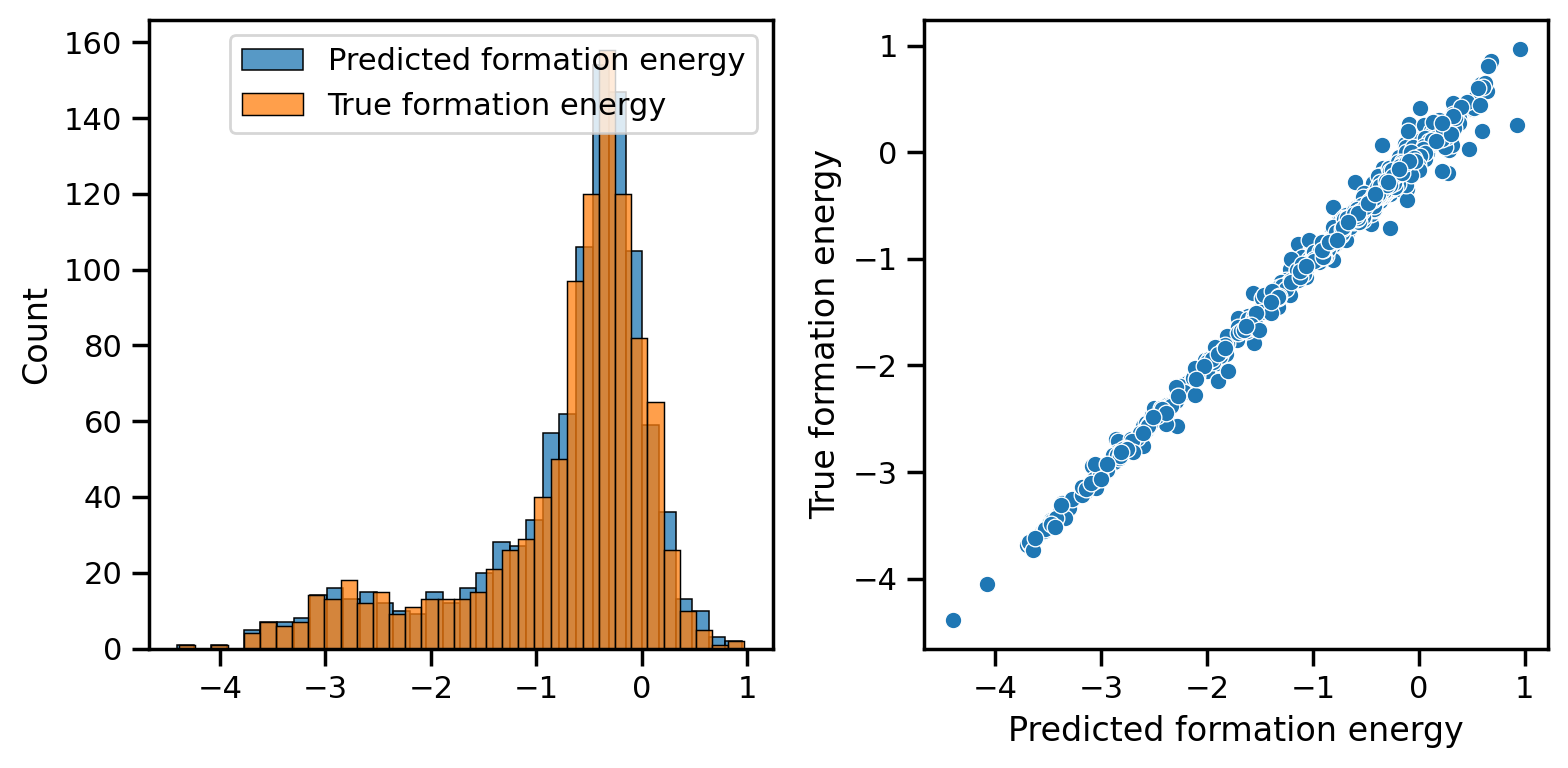

{
    'F1': 0.6565349544072948,
    'DAF': 4.091453940066592,
    'Precision': 0.6352941176470588,
    'Recall': 0.6792452830188679,
    'Accuracy': 0.8896484375,
    'TPR': 0.6792452830188679,
    'FPR': 0.07167630057803469,
    'TNR': 0.9283236994219654,
    'FNR': 0.32075471698113206,
    'TP': 108,
    'FP': 62,
    'TN': 803,
    'FN': 51,
    'MAE': 0.047116091383372805,
    'RMSE': 0.07641600742171412,
    'R2': 0.9216891961102207
}

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)

In [13]:
from collections import defaultdict

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)


preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 18; e_form: P=-0.7821, GT=-0.8008, Δ=0.0187, MAE=0.0187
# Steps: 9; e_form: P=0.0173, GT=-0.0220, Δ=0.0393, MAE=0.0290
# Steps: 11; e_form: P=-0.5452, GT=-0.6088, Δ=0.0635, MAE=0.0405
# Steps: 36; e_form: P=-0.1983, GT=-0.1544, Δ=0.0439, MAE=0.0413
# Steps: 30; e_form: P=-0.3291, GT=-0.1154, Δ=0.2136, MAE=0.0758
# Steps: 18; e_form: P=-0.3536, GT=-0.3905, Δ=0.0369, MAE=0.0693
# Steps: 16; e_form: P=-0.2647, GT=-0.2468, Δ=0.0179, MAE=0.0620
# Steps: 10; e_form: P=-0.6668, GT=-0.4542, Δ=0.2127, MAE=0.0808
# Steps: 14; e_form: P=-1.9693, GT=-1.9089, Δ=0.0604, MAE=0.0785
# Steps: 6; e_form: P=-0.1379, GT=-0.1224, Δ=0.0156, MAE=0.0723
# Steps: 2; e_form: P=-1.8699, GT=-1.8781, Δ=0.0082, MAE=0.0664
# Steps: 5; e_form: P=-1.5338, GT=-1.6101, Δ=0.0762, MAE=0.0672
# Steps: 16; e_form: P=-1.8818, GT=-1.8180, Δ=0.0638, MAE=0.0670
# Steps: 2; e_form: P=-0.3159, GT=-0.3333, Δ=0.0174, MAE=0.0634
# Steps: 14; e_form: P=-0.7020, GT=-0.7299, Δ=0.0279, MAE=0.0611
# Steps: 11; e_form: P=0.0256, 

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_4071594/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


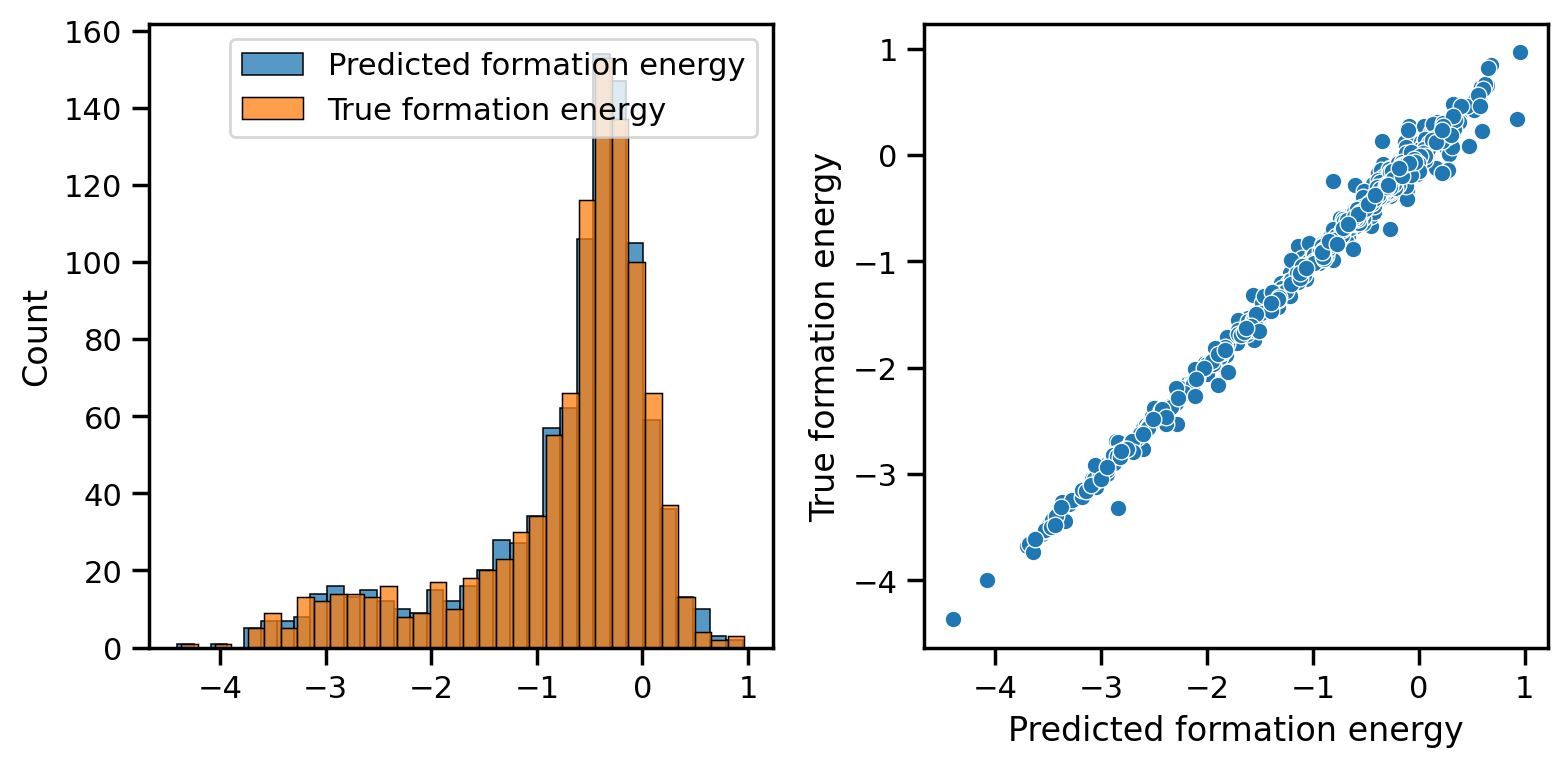

{
    'F1': 0.6225165562913908,
    'DAF': 4.289483065953655,
    'Precision': 0.5529411764705883,
    'Recall': 0.7121212121212122,
    'Accuracy': 0.888671875,
    'TPR': 0.7121212121212122,
    'FPR': 0.08520179372197309,
    'TNR': 0.9147982062780269,
    'FNR': 0.2878787878787879,
    'TP': 94,
    'FP': 76,
    'TN': 816,
    'FN': 38,
    'MAE': 0.04871118069303293,
    'RMSE': 0.07890642042515973,
    'R2': 0.9158297648155722
}

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)